In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [53]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [55]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Notes:
* There are 16,598 video games in this source
* Each game includes features such as name, release year, genre, platform, and sales (in millions)
* There are 271 titles missing the release year and 58 missing publisher information. No other null values.
* These records show games from 1980-2020.
* Sales data shows a wide range of values with NA sales making up roughly half of Global sales.
    * An average video game makes ~$540k in global sales.

In [56]:
null_year = df.loc[df['Year'].isnull()]
for game in null_year['Name']:
    print(game)

Madden NFL 2004
FIFA Soccer 2004
LEGO Batman: The Videogame
wwe Smackdown vs. Raw 2006
Space Invaders
Rock Band
Frogger's Adventures: Temple of the Frog
LEGO Indiana Jones: The Original Adventures
Call of Duty 3
Rock Band
Call of Duty: Black Ops
Rock Band
Triple Play 99
LEGO Harry Potter: Years 5-7
LEGO Batman: The Videogame
Adventure
Combat
NASCAR Thunder 2003
Hitman 2: Silent Assassin
Rock Band
Legacy of Kain: Soul Reaver
Donkey Kong Land III
LEGO Harry Potter: Years 5-7
Air-Sea Battle
Suikoden III
Yakuza 4
LEGO Harry Potter: Years 5-7
Wheel of Fortune
Namco Museum
Rhythm Heaven
The Lord of the Rings: War in the North
The Lord of the Rings: War in the North
Madden NFL 07
MLB SlugFest 20-03
Shaun White Snowboarding
PES 2009: Pro Evolution Soccer
Madden NFL 11
WarioWare: Twisted!
LEGO Harry Potter: Years 5-7
Test Drive Unlimited 2
The Chronicles of Narnia: The Lion, The Witch and The Wardrobe
Test Drive Unlimited 2
Monster Hunter 2
Advance Wars: Days of Ruin
Metal Gear Solid 2: Substan

In [57]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [58]:
# Since at least some of the games have a year as the last 4 characters
# I'll assign those and drop the rest
def extract_year(name):
    try:
        return int(name[-4:]) -1
    except ValueError:
        return None

df.loc[df['Year'].isnull(), 'Year'] = df.loc[df['Year'].isnull(), 'Name'].apply(extract_year)


In [ ]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            255
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [60]:
df.loc[df['Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


It probably does not make sense to guess the publisher so let's go ahead and drop these rows as well as the remaining nulls in the 'Year' column. We can also change the 'Year' column back to an integer, rather than a float.

In [65]:
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16306 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16306 non-null  int64  
 1   Name          16306 non-null  object 
 2   Platform      16306 non-null  object 
 3   Year          16306 non-null  int32  
 4   Genre         16306 non-null  object 
 5   Publisher     16306 non-null  object 
 6   NA_Sales      16306 non-null  float64
 7   EU_Sales      16306 non-null  float64
 8   JP_Sales      16306 non-null  float64
 9   Other_Sales   16306 non-null  float64
 10  Global_Sales  16306 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [67]:
df.shape

(16306, 11)

Great! Now let's explore the data in more detail.

In [72]:
df.groupby('Year')['Name'].count()

Year
499        1
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     483
2002     833
2003     777
2004     746
2005     937
2006    1009
2007    1203
2008    1428
2009    1431
2010    1258
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: Name, dtype: int64

In [80]:
# It looks like our fuction above introduced an anomaly.
# Let's drop that as well as 2017 and 2020.

df.drop(df.loc[df['Year'].isin([499, 2017, 2020])].index, inplace=True)

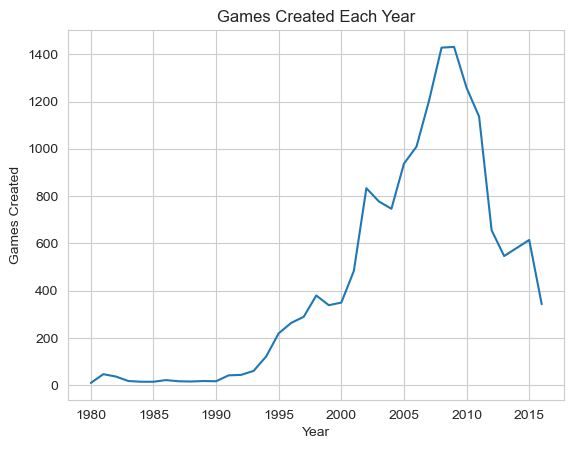

In [81]:
x = df.groupby('Year')['Name'].count().index
y = df.groupby('Year')['Name'].count().values

plt.plot(x, y)
plt.title('Games Created Each Year')
plt.xlabel('Year')
plt.ylabel('Games Created')
plt.show();

Video games were first released in 1980. Not many games were created annually for the first 15 years. From there, popularity rose until about 2009 with about 1,400 titles being released. Following this time there was was a sharp decline in game creation into the late 2010's. The decline in games created corresponds with a GFC in the USA.

In [120]:
# Lets take a look at popular genres
genres_by_year = df.groupby('Year')['Genre'].value_counts()
genres_by_year

Year  Genre     
1980  Misc           4
      Shooter        2
      Sports         1
      Fighting       1
      Action         1
                    ..
2016  Misc          18
      Fighting      14
      Platform      10
      Strategy      10
      Simulation     9
Name: count, Length: 386, dtype: int64

In [135]:
top_genre_by_year = genres_by_year.groupby(level=0).idxmax()
top_genre_by_year

Year
1980        (1980, Misc)
1981      (1981, Action)
1982      (1982, Action)
1983      (1983, Action)
1984      (1984, Puzzle)
1985    (1985, Platform)
1986      (1986, Action)
1987      (1987, Sports)
1988    (1988, Platform)
1989      (1989, Puzzle)
1990      (1990, Action)
1991      (1991, Sports)
1992    (1992, Fighting)
1993    (1993, Platform)
1994      (1994, Sports)
1995     (1995, Shooter)
1996      (1996, Sports)
1997      (1997, Sports)
1998      (1998, Sports)
1999      (1999, Sports)
2000      (2000, Sports)
2001      (2001, Sports)
2002      (2002, Sports)
2003      (2003, Action)
2004      (2004, Action)
2005      (2005, Action)
2006      (2006, Action)
2007      (2007, Action)
2008      (2008, Action)
2009      (2009, Action)
2010      (2010, Action)
2011      (2011, Action)
2012      (2012, Action)
2013      (2013, Action)
2014      (2014, Action)
2015      (2015, Action)
2016      (2016, Action)
Name: count, dtype: object

In [137]:
popular_genres = {}
for item in top_genre_by_year:
    if item[1] in popular_genres.keys():
        popular_genres[item[1]] += 1
    else:
        popular_genres[item[1]] = 1

In [159]:
most_popular = max(popular_genres)
num_years = popular_genres[most_popular]
print(f"The most popular genre is {most_popular}, which had the most games produced in {num_years} out of the {df['Year'].max() - df['Year'].min()} years on record.")

The most popular genre is Sports, which had the most games produced in 10 out of the 36 years on record.


<BarContainer object of 12 artists>

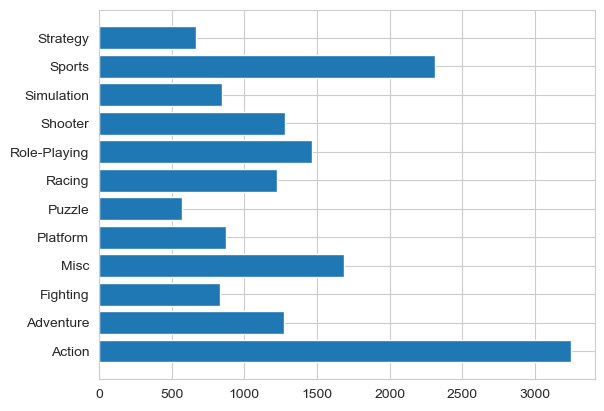

In [182]:
all_time_genres = df.groupby('Genre')['Name'].count()

x = all_time_genres.index
y = all_time_genres.values

plt.barh(x, y)

Although sports games are regularly released, here we see that Action games are the most common game type overall.